In [1]:
%reload_ext autoreload

In [2]:
!python ../src/utils.py

In [3]:
import os
import ROOT as rt
import numpy as np
import matplotlib.pyplot as plt
import utils 
import math
import array
from ROOT import VecOps
from analysis import (df, tree, df_filtered, COLOR_MAP)


name_tag = str(utils.TAG)
print("cwd:", os.getcwd())

cwd: /home/bothsides/projects/optimizing_DEDx_estimator/notebooks


In [4]:
# f = rt.TFile(f"{utils.OUTPUT_ROOT}/2025-06-23_histos.root") #opens up the root file for reading

# !rootls -t ../output/root/2025-06-23_histos.root

In [5]:
# h2_stack = f.Get("h2_overlay")
# c = f.Get("h2_canvas_overlay")

# h2_stack.Draw("nostack")
# c.Draw()

In [6]:
# h2_stack = f.Get("h2_overlay")
# h2_canvas = f.Get("h2_canvas_overlay")
# h2_hist_list = h2_stack.GetHists()


# h2_filtered_stack = f.Get("h2_filtered_overlay")
# h2_filtered_canvas = f.Get("h2_filtered_canvas_overlay")
# h2_filtered_hist_list = h2_filtered_stack.GetHists()


# trunc_stack = f.Get("Trunc_overlay")
# trunc_canvas = f.Get("Trunc_overlay_canvas")
# trunc_hist_list = trunc_stack.GetHists()


# trunc_filtered_stack = f.Get("Trunc_filtered_overlay")
# trunc_filtered_canvas = f.Get("Trunc_filtered_overlay_canvas")
# trunc_filtered_hist_list = trunc_filtered_stack.GetHists()

In [7]:
# h_num = h2_hist_list.At(0)
# h_den = h2_hist_list.At(2)

In [8]:
# print(type(h_num))

In [9]:
# %jsroot on
# drawer = utils.HistogramDrawer()
# rp = drawer.create_two_ratio(h_num, h_den)
# c = drawer.draw_ratio(rp, canvas_name="ratio", title="My Ratio", logy = True)
# c.Draw()


In [10]:
!rootls -l ../data/HSCPgluino_M-1800_fromAOD.root

TDirectoryFile  Jun 04 11:17 2025 HSCPFullAODAnalyzer;1 "HSCPFullAODAnalyzer" 


In [11]:
for event in tree:
    if event.event == 36083:  # or tree.Event.event if using nested branches
        dedx_list = event.cluster_DeDxStrip[1]
        print(f"dE/dx hits for event 36083, track 1:")
        for i, dedx in enumerate(dedx_list):
            print(f"  Hit {i}: {dedx}")
        break

dE/dx hits for event 36083, track 1:
  Hit 0: 2.691075325012207
  Hit 1: 3.039337158203125
  Hit 2: 3.007642984390259
  Hit 3: 3.925776243209839
  Hit 4: 3.292595624923706
  Hit 5: 4.179045677185059
  Hit 6: 2.8493521213531494
  Hit 7: 5.730417728424072
  Hit 8: 3.7041797637939453
  Hit 9: 3.8941407203674316
  Hit 10: 4.590634822845459
  Hit 11: 2.6911017894744873
  Hit 12: 2.9302709102630615
  Hit 13: 2.6567635536193848
  Hit 14: 3.02805757522583
  Hit 15: 15.140792846679688
  Hit 16: 3.1060287952423096


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      1.36826
NDf                       =            3
Edm                       =  7.61033e-07
NCalls                    =          211
Constant                  =      45.3787   +/-   22.6781     
MPV                       =      3.02005   +/-   0.197487    
Sigma                     =     0.324966   +/-   0.138827     	 (limited)


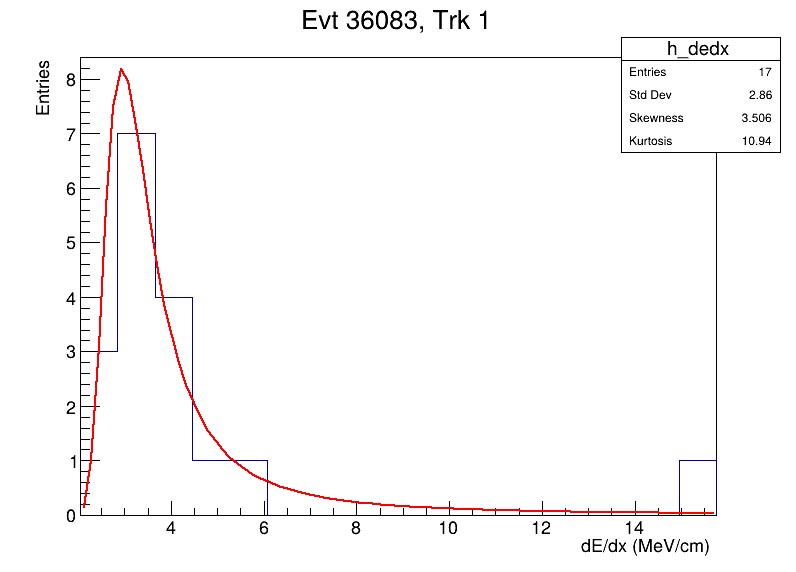

In [12]:
nbins, lo, hi = utils.freedman_diaconis_bins(dedx_list)

hist = rt.TH1F("h_dedx","Evt 36083, Trk 1;dE/dx (MeV/cm);Entries", 
              nbins,    # # bins
              lo,   # x-min
              hi  # x-max
              )
for dedx in dedx_list:
    hist.Fill(dedx)

c = rt.TCanvas("c_dedx", "dE/dx Hits for Event 36083, Track 1", 800, 600)
rt.gStyle.SetOptStat("nersk")
hist.SetMaximum(hist.GetMaximum() * 1.2)
hist.Draw("hist")
mpv_guess, amp_guess, sigma_guess = utils.seeds(hist)
                


landau = rt.TF1("landau", "landau", 0, hi)
landau.SetLineColor(rt.kRed)


landau.SetParameters(amp_guess, mpv_guess, sigma_guess)

hist.Fit(landau, "R")
landau.Draw("same")

c.Update()

In [13]:
for event in tree:
    if event.event == 36099:  # or tree.Event.event if using nested branches
        dedx_list = event.cluster_DeDxStrip[1]
        print(f"dE/dx hits for event 36099, track 1:")
        for i, dedx in enumerate(dedx_list):
            print(f"  Hit {i}: {dedx}")
        break

dE/dx hits for event 36099, track 1:
  Hit 0: 3.246649980545044
  Hit 1: 6.884998321533203
  Hit 2: 4.100213050842285
  Hit 3: 3.358581781387329
  Hit 4: 3.8791840076446533
  Hit 5: 3.7598276138305664
  Hit 6: 2.7155048847198486
  Hit 7: 3.295717716217041
  Hit 8: 4.032230377197266
  Hit 9: 5.560455799102783
  Hit 10: 3.2773280143737793
  Hit 11: 2.3934619426727295
  Hit 12: 2.669706106185913
  Hit 13: 3.424485445022583
  Hit 14: 3.4612908363342285


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =     0.342255
NDf                       =            3
Edm                       =  1.36502e-06
NCalls                    =          122
Constant                  =      22.9371   +/-   9.49094     
MPV                       =      3.17445   +/-   0.365493    
Sigma                     =     0.568375   +/-   0.333952     	 (limited)


Warning in <TFile::Append>: Replacing existing TH1: h_dedx (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_dedx


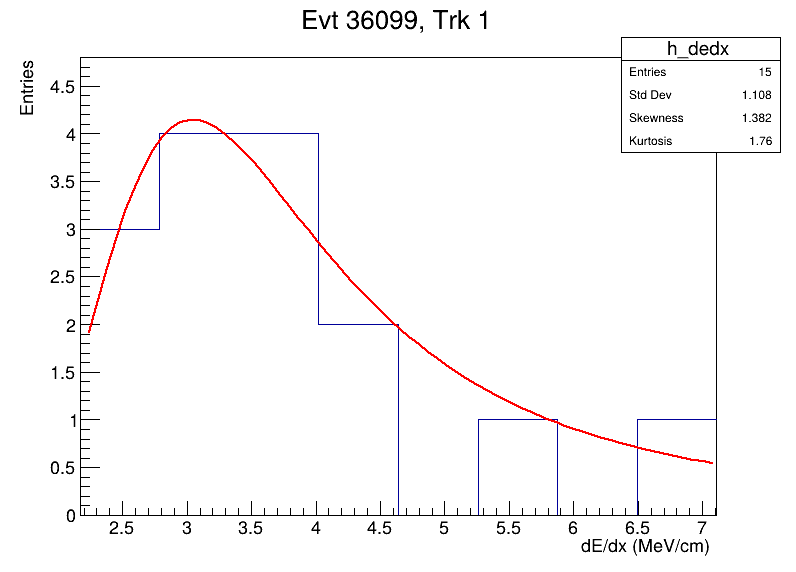

In [14]:
nbins, lo, hi = utils.freedman_diaconis_bins(dedx_list)

hist = rt.TH1F("h_dedx","Evt 36099, Trk 1;dE/dx (MeV/cm);Entries", 
              nbins,    # # bins
              lo,   # x-min
              hi  # x-max
              )
for dedx in dedx_list:
    hist.Fill(dedx)

c = rt.TCanvas("c_dedx", "dE/dx Hits for Event 36099, Track 1", 800, 600)
rt.gStyle.SetOptStat("nersk")
hist.SetMaximum(hist.GetMaximum() * 1.2)
hist.Draw("hist")
mpv_guess, amp_guess, sigma_guess = utils.seeds(hist)
                


landau = rt.TF1("landau", "landau", 0, hi)
landau.SetLineColor(rt.kRed)


landau.SetParameters(amp_guess, mpv_guess, sigma_guess)

hist.Fit(landau, "R")
landau.Draw("same")

c.Update()

In [15]:
landau_mpv = landau.GetParameter(1)
landau_sigma = landau.GetParameter(2)

print(f"Landau MPV: {landau_mpv}, Sigma: {landau_sigma}")

Landau MPV: 3.1744481339112127, Sigma: 0.5683749084053655


In [16]:
for branch in tree.GetListOfBranches():
    for leaf in branch.GetListOfLeaves():
        print(f"Branch `{branch.GetName()}` → Leaf `{leaf.GetName()}` : {leaf.GetTypeName()}")

Branch `DeDx_FiPixel` → Leaf `DeDx_FiPixel` : vector<float>
Branch `DeDx_FiPixelNoL1` → Leaf `DeDx_FiPixelNoL1` : vector<float>
Branch `DeDx_Gi` → Leaf `DeDx_Gi` : vector<float>
Branch `DeDx_GiStrip` → Leaf `DeDx_GiStrip` : vector<float>
Branch `DeDx_Ih` → Leaf `DeDx_Ih` : vector<float>
Branch `DeDx_IhNOM` → Leaf `DeDx_IhNOM` : vector<unsigned int>
Branch `DeDx_IhNoL1` → Leaf `DeDx_IhNoL1` : vector<float>
Branch `DeDx_IhNoL1NOM` → Leaf `DeDx_IhNoL1NOM` : vector<unsigned int>
Branch `DeDx_IhPixel` → Leaf `DeDx_IhPixel` : vector<float>
Branch `DeDx_IhPixelNoL1` → Leaf `DeDx_IhPixelNoL1` : vector<float>
Branch `DeDx_IhStrip` → Leaf `DeDx_IhStrip` : vector<float>
Branch `DeDx_IhStrip1` → Leaf `DeDx_IhStrip1` : vector<float>
Branch `DeDx_IhStrip3` → Leaf `DeDx_IhStrip3` : vector<float>
Branch `DeDx_IhStrip4` → Leaf `DeDx_IhStrip4` : vector<float>
Branch `DeDx_It` → Leaf `DeDx_It` : vector<float>
Branch `DeDx_ItStrip` → Leaf `DeDx_ItStrip` : vector<float>
Branch `DeDx_ItStrip0` → Leaf `DeDx_

In [17]:
branches = [
    "DeDx_PixelNoL1NOM",
    "IsoTrack_pt",
    "HLT_Mu50",
    "IsoTrack_fractionOfValidHits",             
    "IsoTrack_isHighPurityTrack",
    "IsoTrack_normChi2",
    "IsoTrack_dxy",
    "IsoTrack_dz",
    "IsoTrack_numberOfValidHits"
]


for bname in branches:
    br = tree.GetBranch(bname)
    if not br:
        print(f"⚠️  Branch `{bname}` not found in tree.")
        continue

    # every leaf has a type name; most branches have one leaf
    leaves = list(br.GetListOfLeaves())
    types  = [leaf.GetTypeName() for leaf in leaves]
    print(f"Branch `{bname}` → leaf types: {types}")

Branch `DeDx_PixelNoL1NOM` → leaf types: ['vector<unsigned int>']
Branch `IsoTrack_pt` → leaf types: ['vector<double>']
Branch `HLT_Mu50` → leaf types: ['Bool_t']
Branch `IsoTrack_fractionOfValidHits` → leaf types: ['vector<double>']
Branch `IsoTrack_isHighPurityTrack` → leaf types: ['vector<bool>']
Branch `IsoTrack_normChi2` → leaf types: ['vector<double>']
Branch `IsoTrack_dxy` → leaf types: ['vector<double>']
Branch `IsoTrack_dz` → leaf types: ['vector<double>']
Branch `IsoTrack_numberOfValidHits` → leaf types: ['vector<int>']
